In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from loading_data import load_data_from_postgres

query = "SELECT * FROM xdr_data"
df = load_data_from_postgres(query)

if df is not None:
    df=df.dropna()
    print("Successfuly loaded the data")
    print(df.head())
else:
    print("Failed to load the data")
    

c:\Users\HP\Desktop\tenx_w2\kaim-week-2\scripts\loading_data.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfuly loaded the data
       Bearer Id            Start  Start ms              End  End ms  \
11  1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
20  1.304243e+19   4/17/2019 0:35     363.0   4/25/2019 4:52   691.0   
68  1.304243e+19  4/21/2019 10:09       1.0   4/25/2019 1:39   272.0   
78  1.304243e+19  4/21/2019 19:35     344.0   4/25/2019 2:59   259.0   
84  1.304243e+19   4/22/2019 1:17     301.0   4/25/2019 1:17   938.0   

    Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
11   889834.0  2.082019e+14   3.366447e+10  8.600910e+13            T21335C   
20   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
68   314961.0  2.082014e+14   3.366274e+10  3.528141e+13            T72937C   
78   285833.0  2.082018e+14   3.366917e+10  3.566261e+13            L41432B   
84   259201.0  2.082014e+14   3.366555e+10  8.637690e+13            T85779A   

    ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Byt

In [7]:
from user_aggregation import aggregate_metrics
aggregated_data = aggregate_metrics(df)
print(aggregated_data)

       MSISDN/Number  sessions_frequency  total_duration  total_traffic
0       3.360101e+10                   9        166995.0   7.846493e+09
1       3.360103e+10                   9        501570.0   5.733478e+09
2       3.360105e+10                   9        536121.0   4.008580e+09
3       3.360106e+10                   9         94788.0   6.927446e+09
4       3.360108e+10                   9        237447.0   4.130623e+09
...              ...                 ...             ...            ...
13677   3.378968e+10                   9       1286838.0   3.100519e+09
13678   3.378991e+10                   9        397791.0   8.118796e+09
13679   3.378992e+10                   9        489051.0   5.191419e+09
13680   3.378994e+10                   9        331308.0   1.745255e+09
13681   3.378998e+10                   9        286776.0   3.344901e+09

[13682 rows x 4 columns]


   MSISDN/Number  sessions_frequency  total_duration  total_traffic  cluster
0   3.360101e+10           -0.395665       -0.877863       0.523676        2
1   3.360103e+10           -0.395665       -0.502067       0.001807        2
2   3.360105e+10           -0.395665       -0.463259      -0.424205        2
3   3.360106e+10           -0.395665       -0.958966       0.296692        2
4   3.360108e+10           -0.395665       -0.798731      -0.394063        2


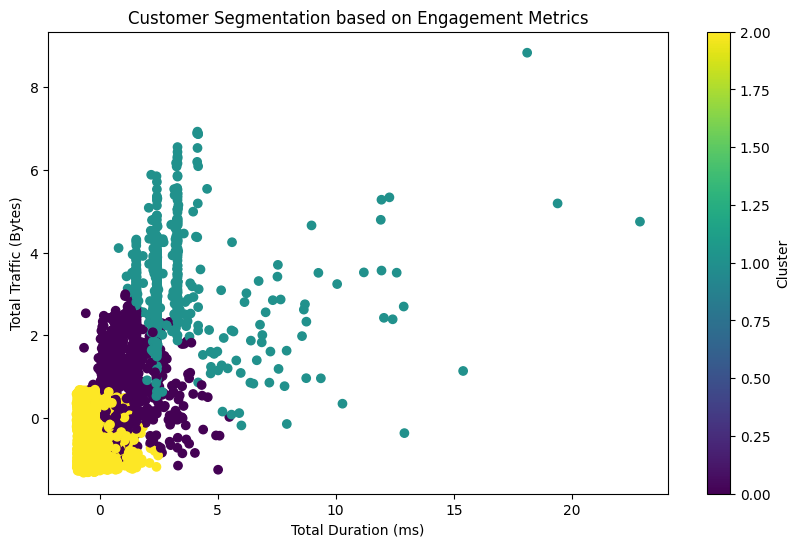

In [8]:
from norm_clst import normalize_metrics, run_kmeans_clustering, plot_clusters
aggregated_data = normalize_metrics(aggregated_data)
aggregated_data, kmeans_model = run_kmeans_clustering(aggregated_data, n_clusters=3)
print(aggregated_data.head())  # Check the data with cluster labels
plot_clusters(aggregated_data)


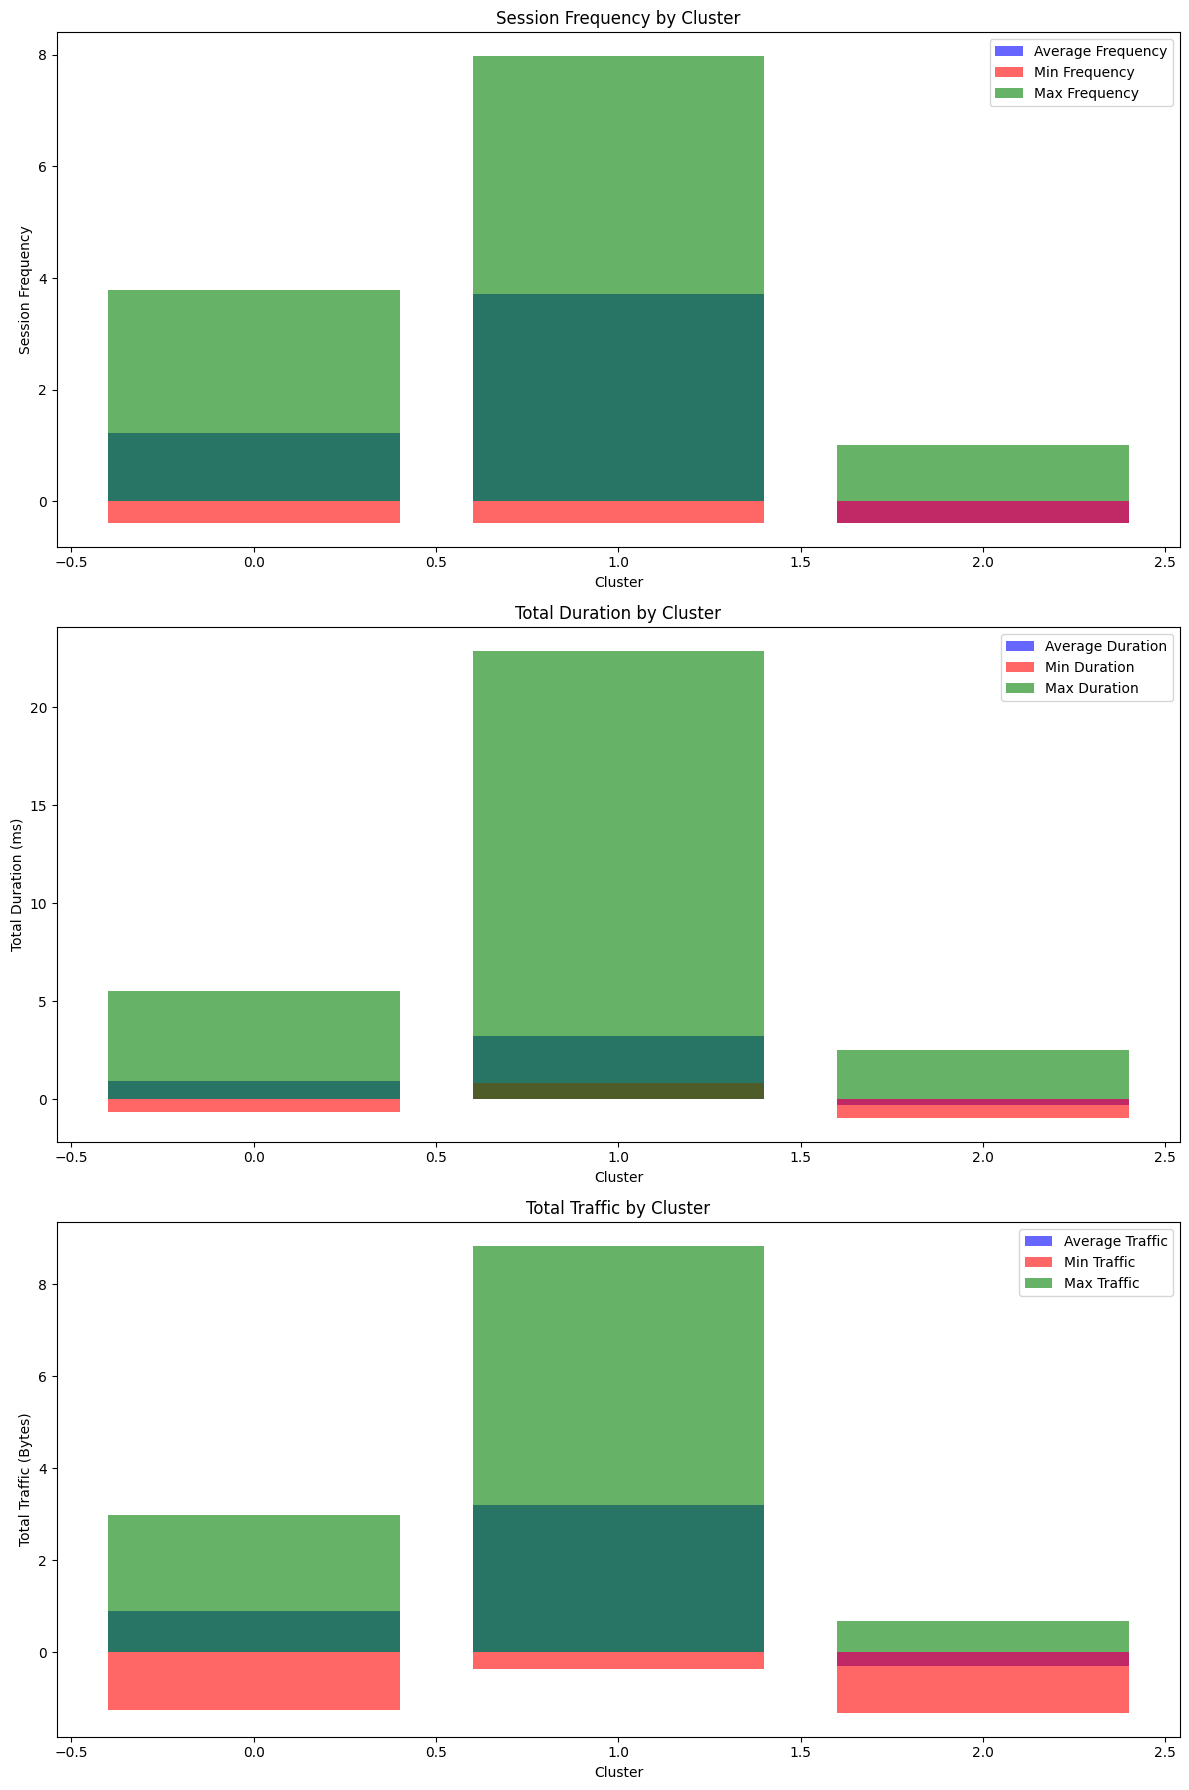

In [17]:
from compute_clst import compute_cluster_statistics,plot_cluster_statistics
cluster_stats = compute_cluster_statistics(aggregated_data)

# Visualize the cluster statistics
plot_cluster_statistics(cluster_stats)


In [23]:
from user_total_traffic import aggregate_user_traffic

# Apply the function to the DataFrame
top_users_per_app = aggregate_user_traffic(df)

# Display results for each application
for app, top_users in top_users_per_app.items():
    print(f"Top 10 Users for {app}:")
    display(top_users)


Top 10 Users for Social Media:


,MSISDN/Number,Social Media_traffic
0,3.366258e+10,143708463.0
1,3.365955e+10,141222510.0
2,3.365816e+10,139496319.0
3,3.366773e+10,132639903.0
4,3.366552e+10,130174344.0
5,3.369844e+10,121905513.0
6,3.376387e+10,121620123.0
7,3.366642e+10,120089745.0
8,3.365813e+10,119833380.0
9,3.366555e+10,118316223.0


Top 10 Users for YouTube:


,MSISDN/Number,YouTube_traffic
0,3.376354e+10,1.587489e+09
1,3.366130e+10,1.502995e+09
2,3.366376e+10,1.421059e+09
3,3.365955e+10,1.414437e+09
4,3.365028e+10,1.364313e+09
5,3.366060e+10,1.360642e+09
6,3.376386e+10,1.350992e+09
7,3.366818e+10,1.335201e+09
8,3.366180e+10,1.323386e+09
9,3.369812e+10,1.315784e+09


Top 10 Users for Netflix:


,MSISDN/Number,Netflix_traffic
0,3.376378e+10,1.598388e+09
1,3.366773e+10,1.485738e+09
2,3.365955e+10,1.459891e+09
3,3.369844e+10,1.423674e+09
4,3.366130e+10,1.392181e+09
5,3.365808e+10,1.378117e+09
6,3.365887e+10,1.370350e+09
7,3.366552e+10,1.363601e+09
8,3.366258e+10,1.362134e+09
9,3.366149e+10,1.359670e+09


Top 10 Users for Google:


,MSISDN/Number,Google_traffic
0,3.365073e+10,561083787.0
1,3.366015e+10,525671586.0
2,3.366893e+10,513529416.0
3,3.365955e+10,510191649.0
4,3.369925e+10,502676145.0
5,3.366201e+10,502074378.0
6,3.376357e+10,496371357.0
7,3.366552e+10,488532897.0
8,3.366887e+10,487307916.0
9,3.365061e+10,480213153.0


Top 10 Users for Email:


,MSISDN/Number,Email_traffic
0,3.366578e+10,169720470.0
1,3.365813e+10,158896512.0
2,3.366552e+10,149885325.0
3,3.365922e+10,147692196.0
4,3.369844e+10,147176217.0
5,3.366258e+10,140255010.0
6,3.366180e+10,138762333.0
7,3.376243e+10,137553399.0
8,3.369976e+10,136075653.0
9,3.365955e+10,135514458.0


Top 10 Users for Gaming:


,MSISDN/Number,Gaming_traffic
0,3.365955e+10,3.734446e+10
1,3.365073e+10,3.058043e+10
2,3.366180e+10,3.043081e+10
3,3.369925e+10,3.042154e+10
4,3.366258e+10,3.013197e+10
5,3.366969e+10,2.965231e+10
6,3.369917e+10,2.912272e+10
7,3.365813e+10,2.870312e+10
8,3.365913e+10,2.832031e+10
9,3.366555e+10,2.821836e+10


Top 10 Users for Other:


,MSISDN/Number,Other_traffic
0,3.369925e+10,3.156707e+10
1,3.369990e+10,3.036803e+10
2,3.365873e+10,2.917467e+10
3,3.366160e+10,2.881151e+10
4,3.369812e+10,2.779028e+10
5,3.376155e+10,2.741953e+10
6,3.369933e+10,2.728039e+10
7,3.366569e+10,2.708482e+10
8,3.365813e+10,2.694156e+10
9,3.369916e+10,2.692860e+10


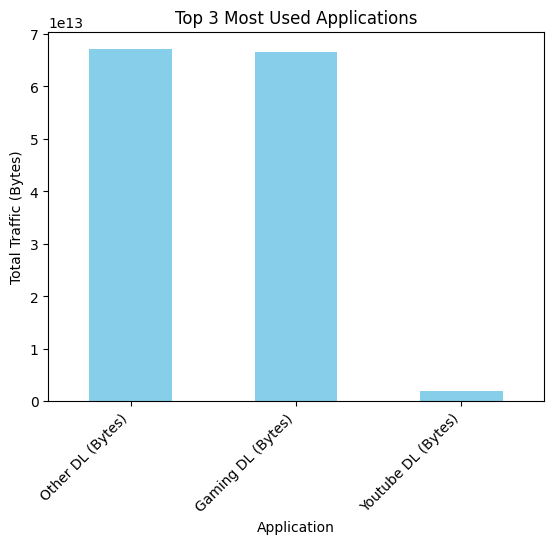

In [19]:
from top_three import plot_top_3_applications
plot_top_3_applications(df)

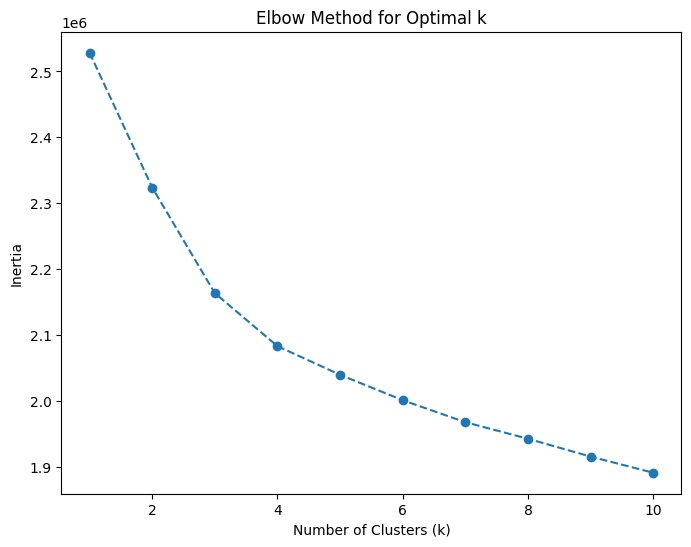

    MSISDN/Number  engagement_cluster
11   3.366447e+10                   2
20   3.365875e+10                   2
68   3.366274e+10                   0
78   3.366917e+10                   0
84   3.366555e+10                   2


In [22]:
from k_means import kmeans_clustering
kmeans_clustering(df)

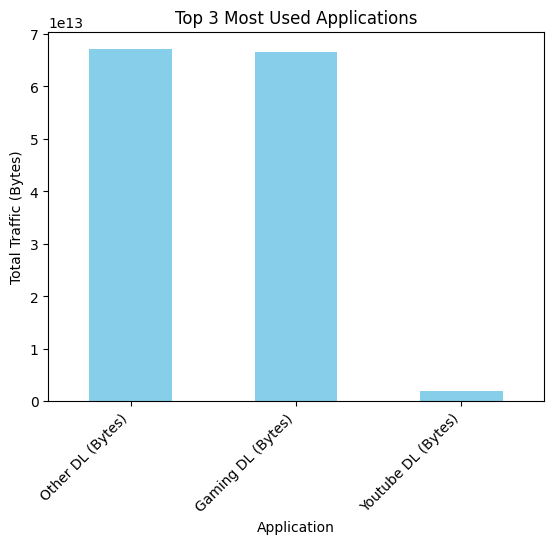

In [43]:
from top_three import plot_top_3_applications
plot_top_3_applications(df)